# Data Exploration

## Import Packages

In [1]:
import pandas as pd
import sqlite3

## Load Data

In [2]:
conn = sqlite3.connect("/Users/Kejsi/made-template/data.sqlite")

ds1 = pd.read_sql_query("SELECT * FROM planet_systems", conn, index_col = "Planet Name")
ds2 = pd.read_sql_query("SELECT * FROM radial_velocity", conn, index_col = "Planet Name")
ds3 = pd.read_sql_query("SELECT * FROM pulsar_timing", conn, index_col = "Planet Name")
ds4 = pd.read_sql_query("SELECT * FROM microlensing", conn, index_col = "Planet Name")
ds5 = pd.read_sql_query("SELECT * FROM direct_imaging", conn, index_col = "Planet Name")
ds6 = pd.read_sql_query("SELECT * FROM transit", conn, index_col = "Planet Name")

## The First Dataframe: _Planetary Systems_

In [3]:
ds1.head(10) # Showing only the first 10 rows of the table

,Discovery Method,Discovery Year,Radial Velocity,Timing,Transit,Microlensing,Imaging
Planet Name,,,,,,,
OGLE-2016-BLG-1227L b,Microlensing,2020,0,0,0,1,0
Kepler-276 c,Transit,2013,0,0,1,0,0
Kepler-829 b,Transit,2016,0,0,1,0,0
K2-283 b,Transit,2018,0,0,1,0,0
Kepler-477 b,Transit,2016,0,0,1,0,0
TOI-1260 c,Transit,2021,1,0,1,0,0
HD 149143 b,Radial Velocity,2005,1,0,0,0,0
HD 99492 b,Radial Velocity,2004,1,0,0,0,0
nu Oph c,Radial Velocity,2012,1,0,0,0,0


In [4]:
""" Counter program to find out how many planets each method has detected """

# Global counters for each method to be used for each year
planets_rv = 0
planets_pt = 0
planets_ml = 0
planets_di = 0
planets_tr = 0

# Lists to add the counters to
list_rv = []
list_pt = []
list_ml = []
list_di = []
list_tr = []

# Radial Velocity
rv = ds1.groupby("Discovery Year")['Radial Velocity'].sum()
for year, planets_rv in rv.items(): list_rv.extend({planets_rv})
        
# Pulsar Timing
pt = ds1.groupby("Discovery Year")['Timing'].sum()
for year, planets_pt in pt.items(): list_pt.extend({planets_pt})
        
# Microlensing
ml = ds1.groupby("Discovery Year")['Microlensing'].sum()
for year, planets_ml in ml.items(): list_ml.extend({planets_ml})
        
# Direct Imaging
di = ds1.groupby("Discovery Year")['Imaging'].sum()
for year, planets_di in di.items(): list_di.extend({planets_di})

# Transit
tr = ds1.groupby("Discovery Year")['Transit'].sum()
for year, planets_tr in tr.items(): list_tr.extend({planets_tr})

# Create list for the years 1992-2023
year = ds1['Discovery Year'].tolist()
year = list(set(year))

# Create Pandas dataframe
dset = {'Year': year, 'RV': list_rv, 'PT': list_pt, 'ML': list_ml, 'DI': list_di, 'TR': list_tr}
df = pd.DataFrame(dset)
df.set_index('Year', inplace = True)
df

,RV,PT,ML,DI,TR
Year,,,,,
1992,0,2,0,0,0
1994,0,1,0,0,0
1995,1,0,0,0,0
1996,6,0,0,0,0
1997,1,0,0,0,0
1998,6,0,0,0,0
1999,13,0,0,0,1
2000,16,0,0,0,0
2001,12,0,0,0,1


In [50]:
""" Sum of each row """

results = df.agg('sum', axis = 1)
print(results)

Year
1992       2
1994       1
1995       1
1996       6
1997       1
1998       6
1999      14
2000      16
2001      13
2002      30
2003      22
2004      34
2005      39
2006      36
2007      68
2008      82
2009     111
2010     141
2011     181
2012     182
2013     159
2014     950
2015     208
2016    1600
2017     198
2018     392
2019     262
2020     305
2021     604
2022     440
2023     399
dtype: int64


<Axes: title={'center': 'Planets discovered from 1992-2023'}, xlabel='Year'>

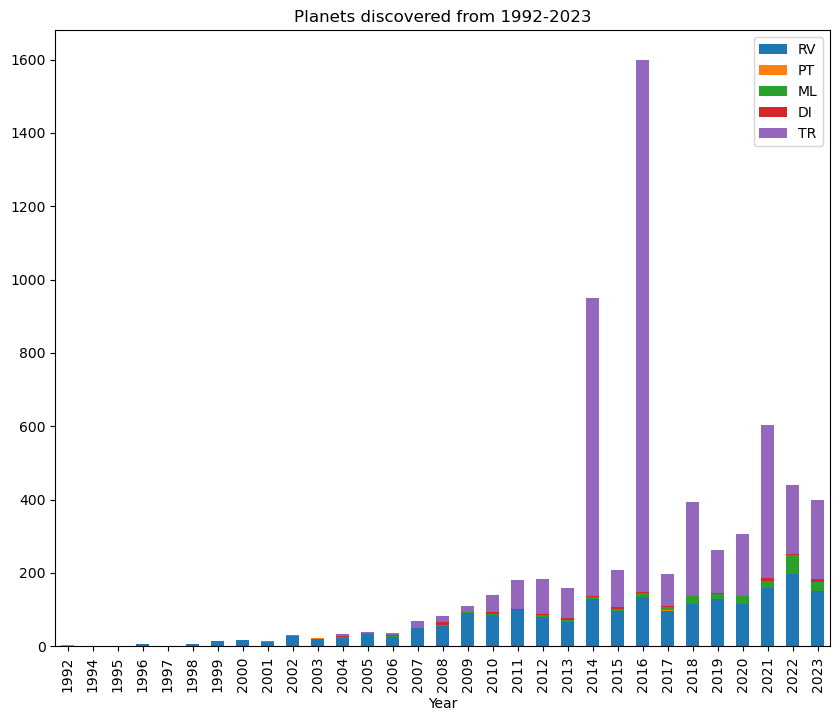

In [6]:
df.plot.bar(stacked = True, title = 'Planets discovered from 1992-2023', figsize = (10, 8))

# The First Dataframe: *Radial Velocity*

In [7]:
ds2.head(10)

,Planet Radius (Earth),Planet Radius (Jupiter),Planet Mass (Earth),Planet Mass (Jupiter),Planet Density,Eccentricity,Inclination,Transit Depth,Transit Duration,Ratio of Planet to Stellar Ratio,Stellar Radius,Stellar Mass,Stellar Surface Gravity,Stellar Age,Stellar Density,Right Ascention,Declination,Galactic Latitude,Galactic Longitude,Distance
Planet Name,,,,,,,,,,,,,,,,,,,,
HD 149143 b,13.60,1.220,422.71390,1.33000,0.923,0.0167,NaN,NaN,NaN,NaN,1.44,1.20,4.25,4.28,0.28619,248.212671,2.084455,31.48148,17.51640,73.2801
HD 99492 b,5.44,0.486,25.50000,0.08023,0.870,0.0340,NaN,NaN,NaN,NaN,0.82,0.85,4.57,4.80,2.83673,171.689687,3.007133,58.50710,259.27385,18.2038
nu Oph c,12.00,1.070,7838.32346,24.66200,24.900,0.1790,90.000,NaN,NaN,NaN,12.24,2.61,2.64,0.65,NaN,269.756601,-9.774134,6.97417,18.16751,46.2107
75 Cet b,13.30,1.180,787.89662,2.47900,1.840,0.0930,NaN,NaN,NaN,NaN,10.38,1.92,2.69,NaN,NaN,38.039160,-1.035027,-54.44177,169.94418,82.9613
gam Lib b,13.70,1.220,357.87479,1.12600,0.765,0.1600,NaN,NaN,NaN,NaN,12.38,1.78,2.50,2.82,NaN,233.881864,-14.789502,32.19557,351.51546,47.4017
HD 113337 c,12.10,1.080,6299.67686,19.82100,19.500,0.1640,57.478,NaN,NaN,NaN,1.53,1.41,4.21,0.15,0.56519,195.443850,63.610328,53.47917,121.00202,36.1800
HIP 12961 b,13.20,1.180,114.41880,0.36000,0.273,0.1700,NaN,NaN,NaN,NaN,0.65,0.69,4.65,NaN,3.02935,41.680075,-23.086005,-63.65019,210.53871,23.3710
HD 11755 b,12.80,1.140,1789.38290,5.63000,4.690,0.1900,NaN,NaN,NaN,NaN,20.58,0.72,1.67,10.20,NaN,29.707836,73.152137,10.92581,127.83989,235.0450
HD 29985 b,12.80,1.140,1739.47487,5.47300,4.560,0.2610,52.658,NaN,NaN,NaN,0.57,0.75,4.79,NaN,5.57159,70.521659,-33.921070,-40.50413,235.69993,31.2707


<Axes: xlabel='Planet Mass (Earth)', ylabel='Distance'>

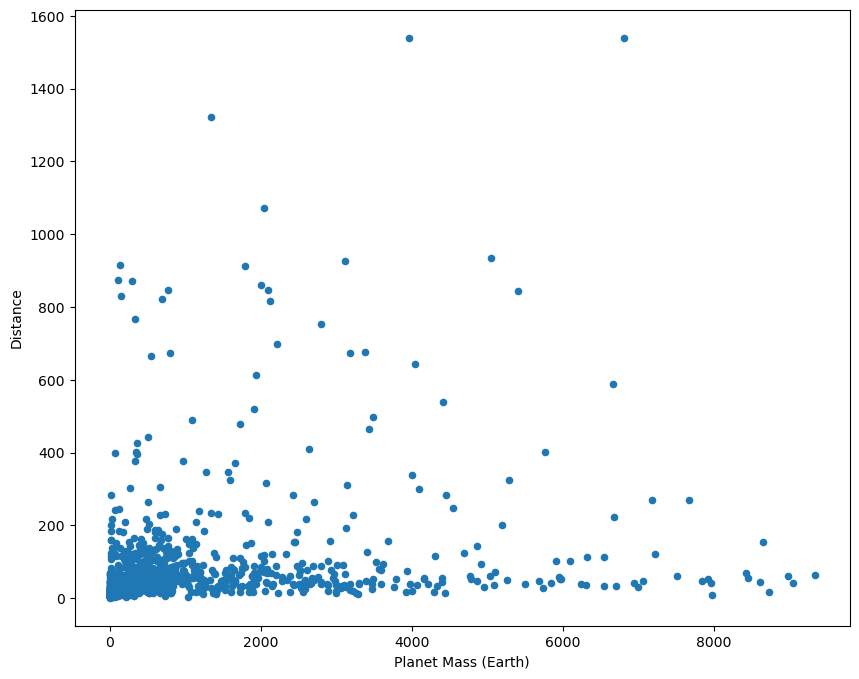

In [8]:
ds2.plot.scatter("Planet Mass (Earth)", "Distance", figsize = (10, 8))

<Axes: xlabel='Planet Radius (Earth)', ylabel='Distance'>

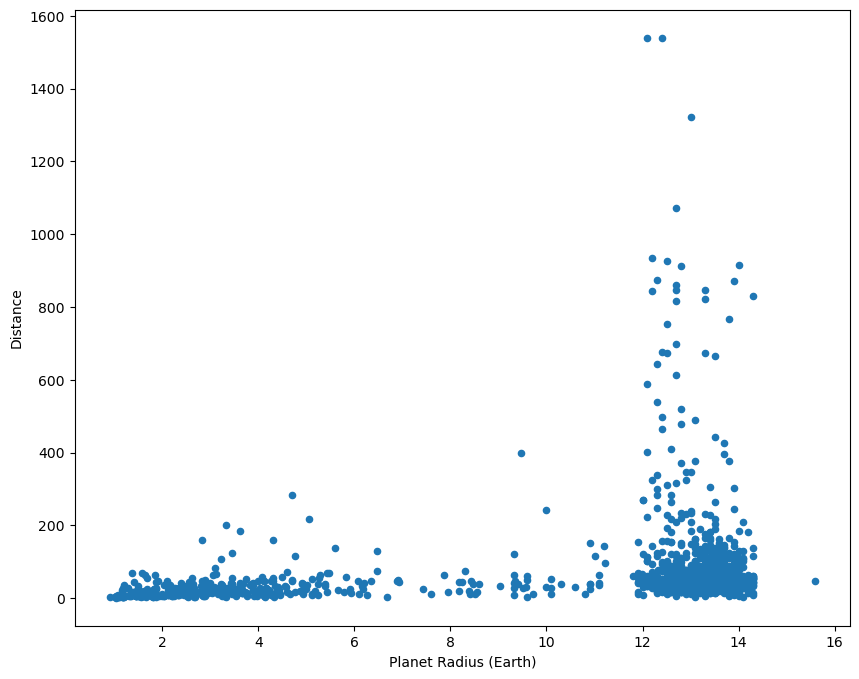

In [9]:
ds2.plot.scatter("Planet Radius (Earth)", "Distance", figsize = (10, 8))

<Axes: xlabel='Planet Mass (Jupiter)', ylabel='Distance'>

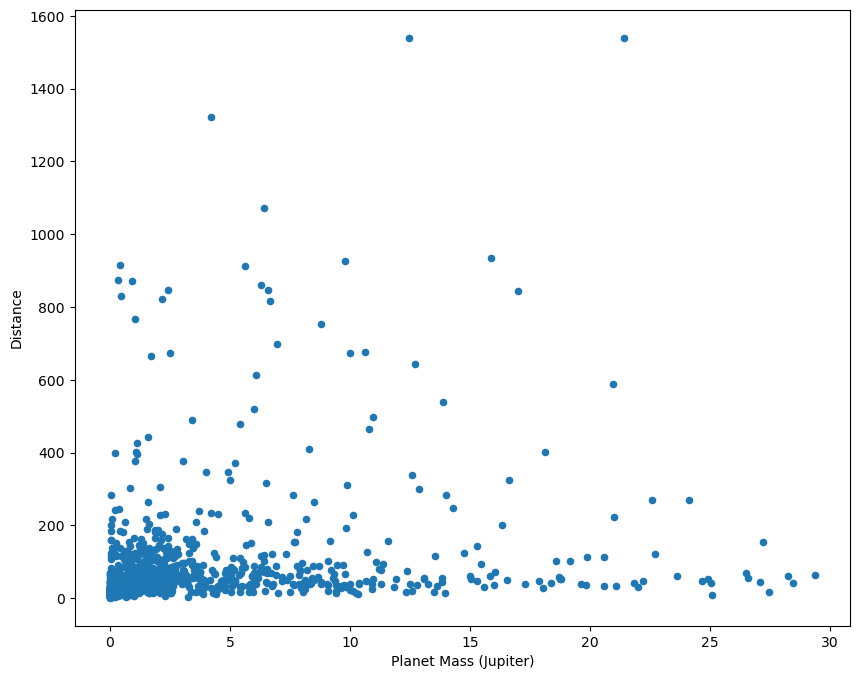

In [10]:
ds2.plot.scatter("Planet Mass (Jupiter)", "Distance", figsize = (10, 8))

<Axes: xlabel='Planet Radius (Jupiter)', ylabel='Distance'>

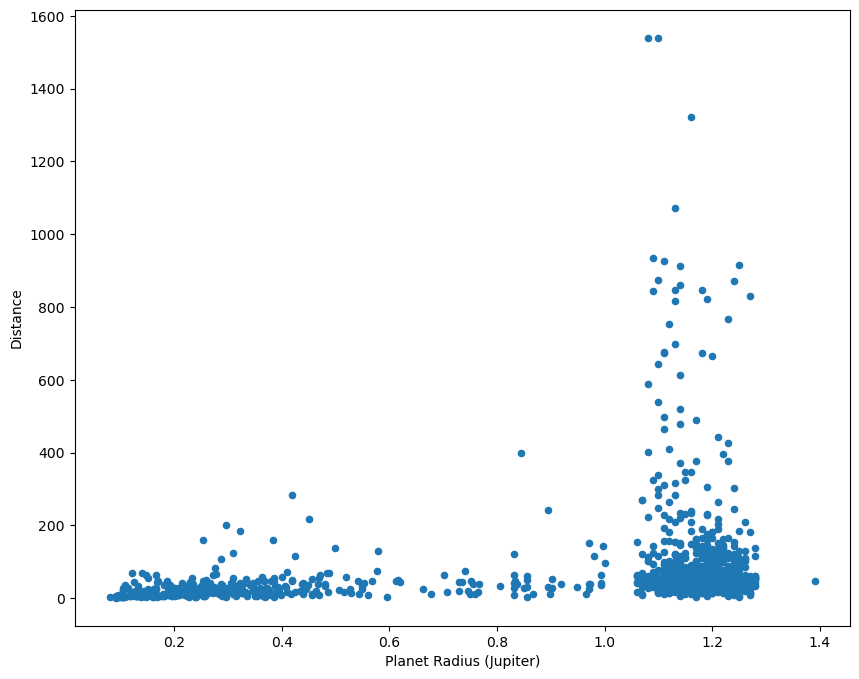

In [11]:
ds2.plot.scatter("Planet Radius (Jupiter)", "Distance", figsize = (10, 8))

<Axes: xlabel='Stellar Mass', ylabel='Stellar Age'>

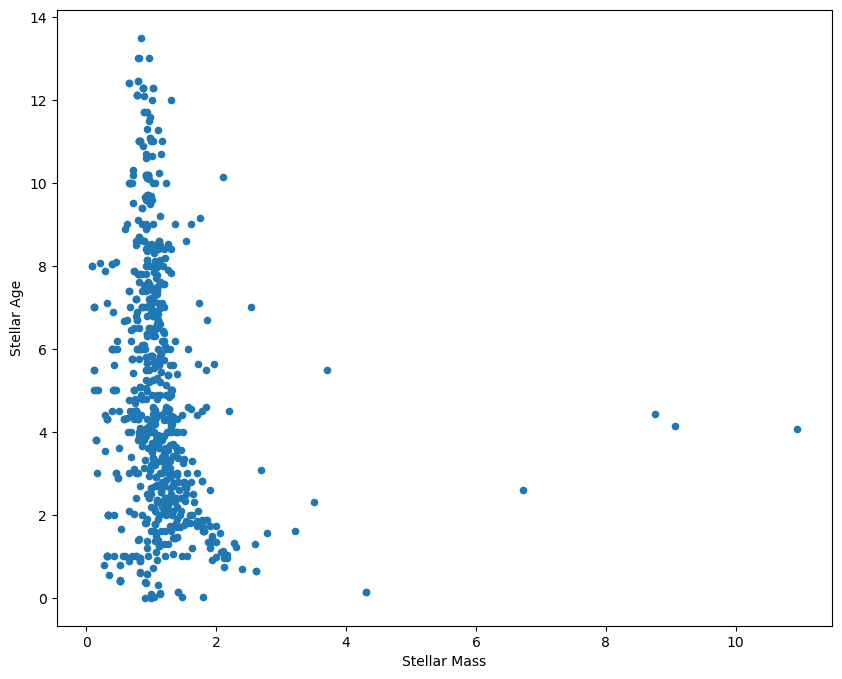

In [12]:
ds2.plot.scatter("Stellar Mass", "Stellar Age", figsize = (10, 8))

<Axes: xlabel='Planet Density', ylabel='Stellar Density'>

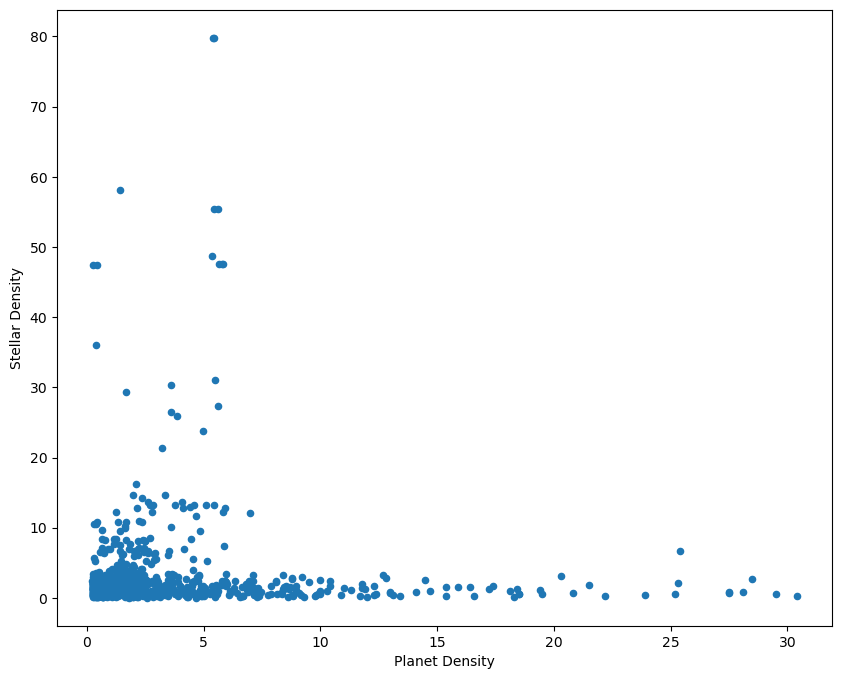

In [13]:
ds2.plot.scatter("Planet Density", "Stellar Density", figsize = (10, 8))

<Axes: xlabel='Eccentricity', ylabel='Inclination'>

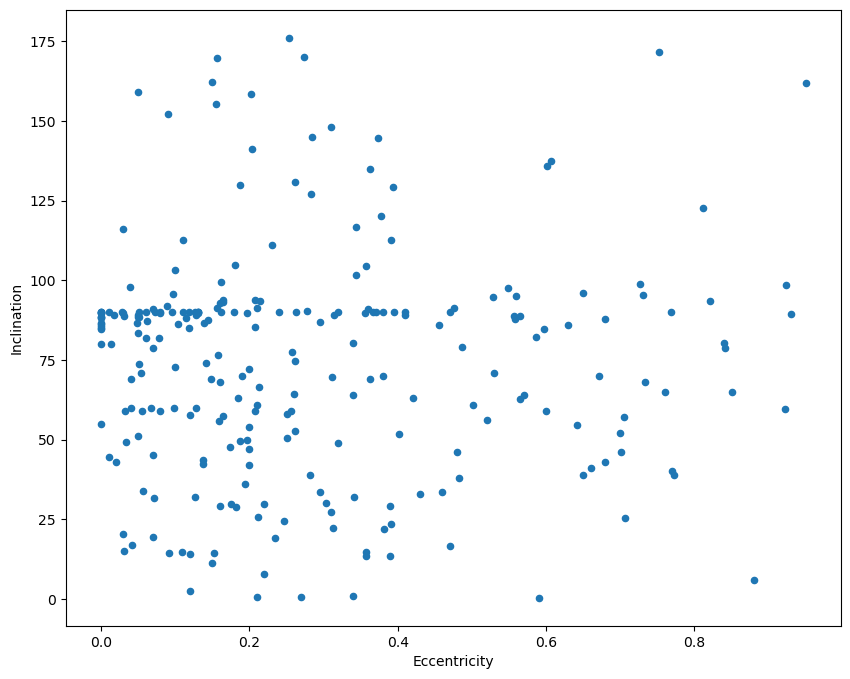

In [14]:
ds2.plot.scatter("Eccentricity", "Inclination", figsize = (10, 8))

<Axes: xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

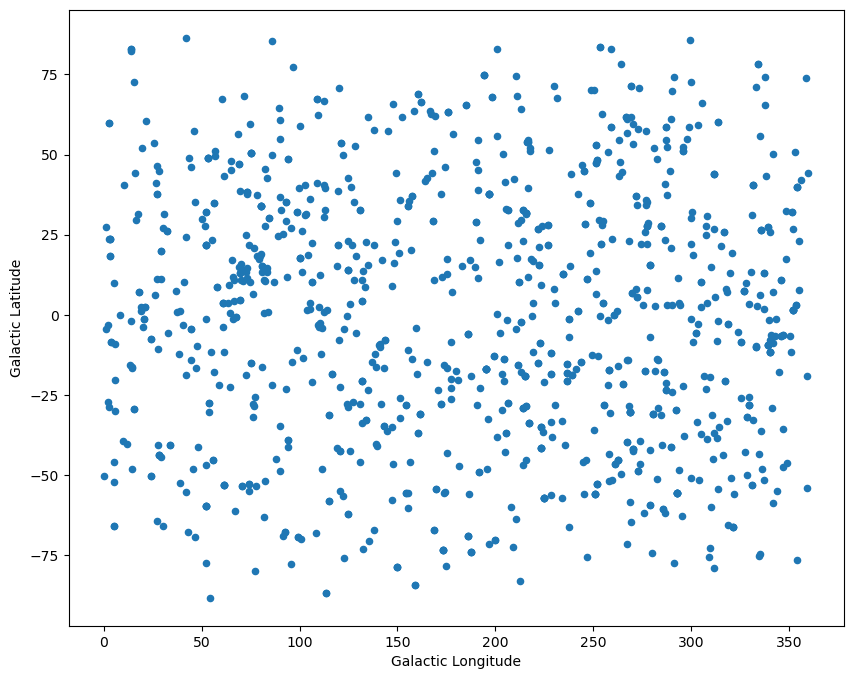

In [15]:
ds2.plot.scatter("Galactic Longitude", "Galactic Latitude", figsize = (10, 8))

<Axes: xlabel='Right Ascention', ylabel='Declination'>

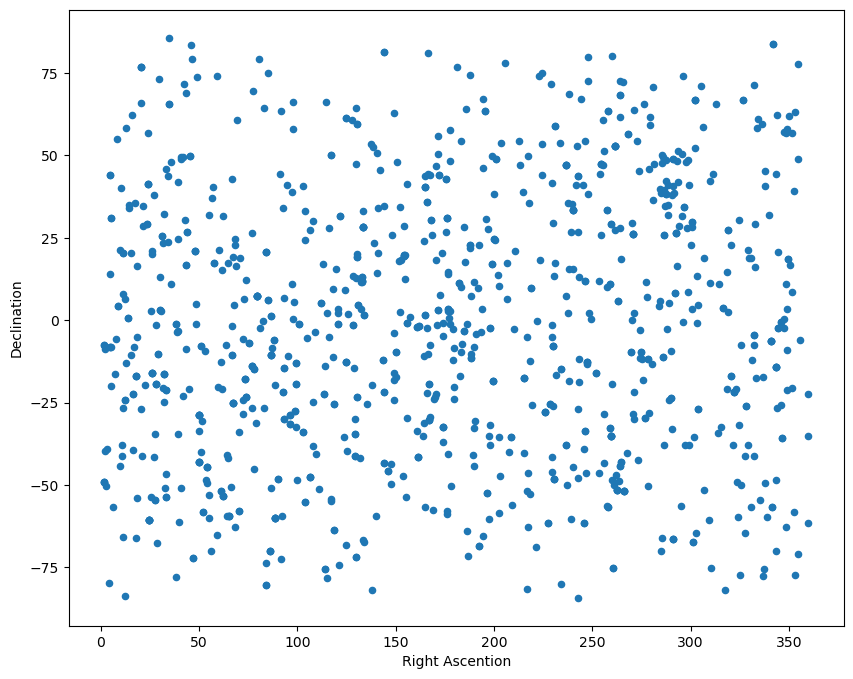

In [16]:
ds2.plot.scatter("Right Ascention", "Declination", figsize = (10, 8))

<Axes: xlabel='Transit Depth', ylabel='Transit Duration'>

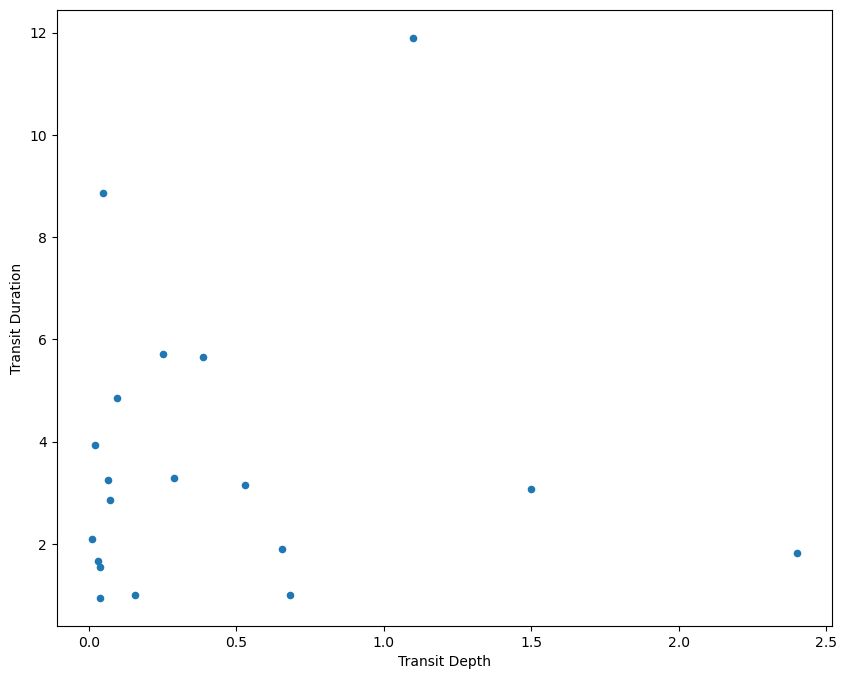

In [17]:
ds2.plot.scatter("Transit Depth", "Transit Duration", figsize = (10, 8))

# The First Dataframe: *Pulsar Timing*

In [18]:
ds3.head(10)

,Planet Radius (Earth),Planet Radius (Jupiter),Planet Mass (Earth),Planet Mass (Jupiter),Planet Density,Eccentricity,Stellar Mass,Right Ascention,Declination,Galactic Latitude,Galactic Longitude,Distance
Planet Name,,,,,,,,,,,,
PSR B1257+12 c,1.910,0.170,4.30000,0.01353,3.39,0.0186,1.40,195.014903,12.682353,75.41367,311.30973,600.000000
PSR B1257+12 d,1.800,0.161,3.90000,0.01227,3.67,0.0264,1.40,195.014903,12.682353,75.41367,311.30973,600.000000
PSR B0329+54 b,1.220,0.109,1.97000,0.00620,5.96,0.2360,1.44,53.247275,54.579164,-1.22030,144.99499,504.933121
PSR J2322-2650 b,13.900,1.240,252.64307,0.79490,1.84,0.0017,1.40,350.644348,-26.849533,-70.22813,28.63696,230.000000
PSR B1257+12 b,0.338,0.030,0.02000,0.00006,2.85,0.0000,1.40,195.014903,12.682353,75.41367,311.30973,600.000000
PSR B1620-26 b,13.300,1.180,794.57500,2.50000,1.86,NaN,1.35,245.909262,-26.531594,15.95997,350.97627,NaN
PSR J1719-1438 b,NaN,NaN,382.80000,1.20000,23.00,0.0600,1.40,259.791971,-14.633600,12.83834,8.85850,1200.000000


<Axes: xlabel='Planet Mass (Earth)', ylabel='Distance'>

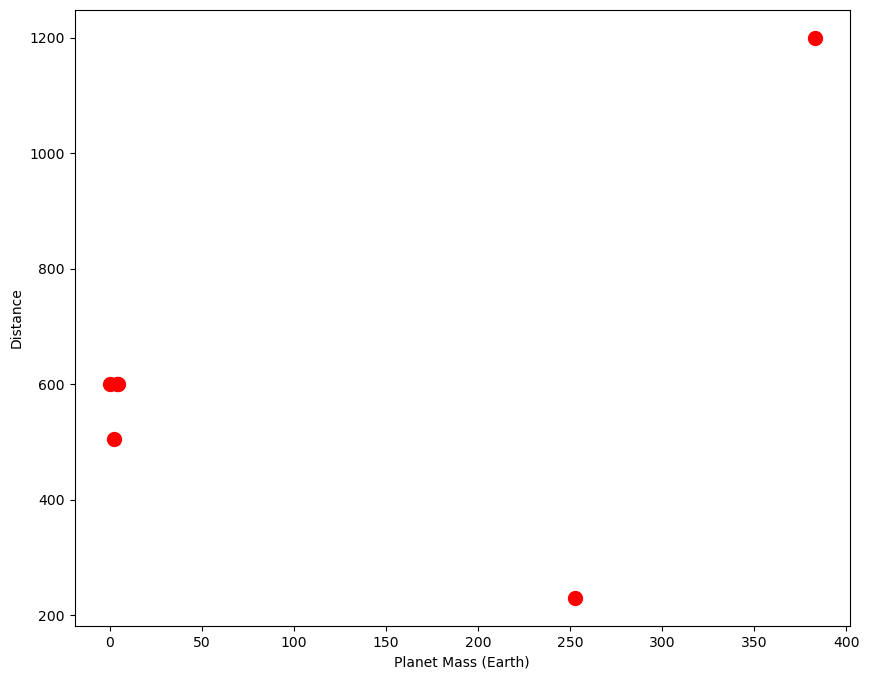

In [19]:
ds3.plot.scatter("Planet Mass (Earth)", "Distance", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Planet Mass (Jupiter)', ylabel='Distance'>

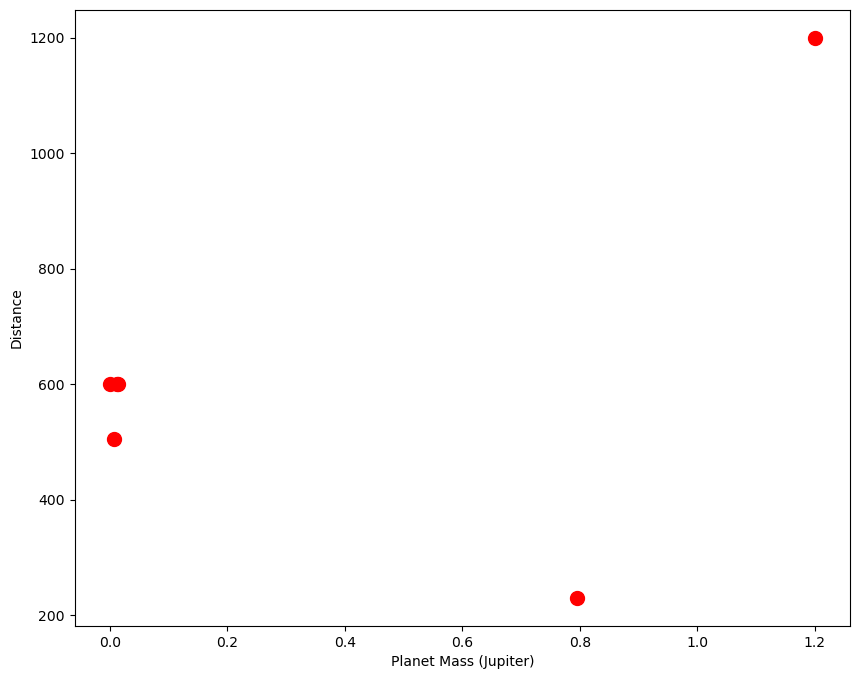

In [20]:
ds3.plot.scatter("Planet Mass (Jupiter)", "Distance", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Planet Radius (Earth)', ylabel='Distance'>

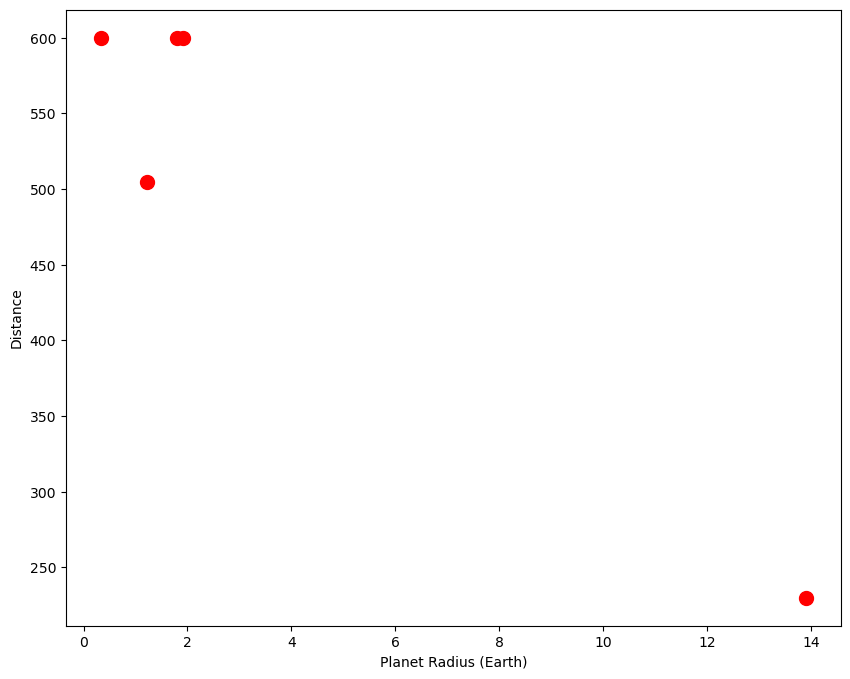

In [21]:
ds3.plot.scatter("Planet Radius (Earth)", "Distance", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Planet Radius (Jupiter)', ylabel='Distance'>

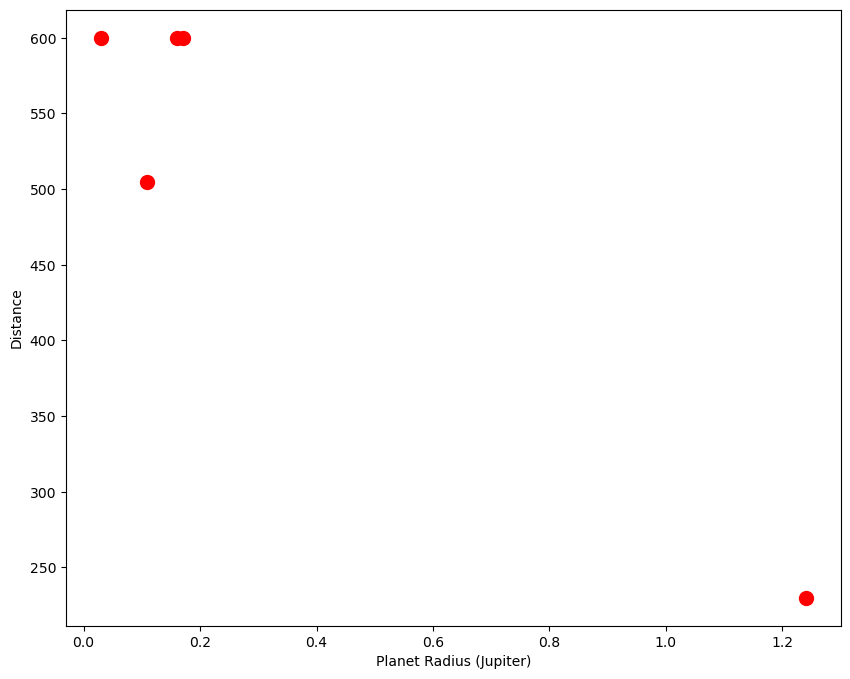

In [22]:
ds3.plot.scatter("Planet Radius (Jupiter)", "Distance", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Stellar Mass', ylabel='Distance'>

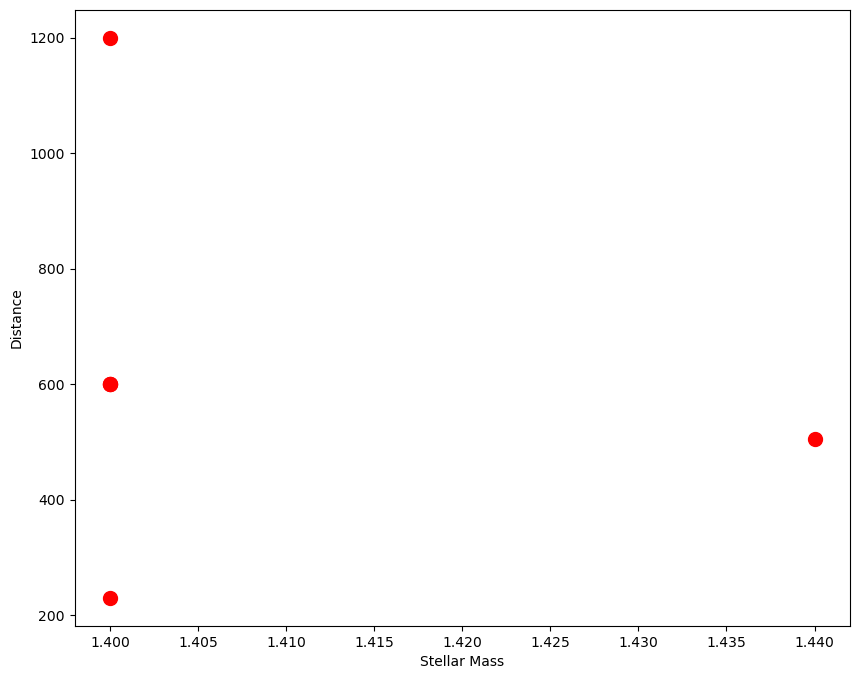

In [23]:
ds3.plot.scatter("Stellar Mass", "Distance", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Eccentricity', ylabel='Declination'>

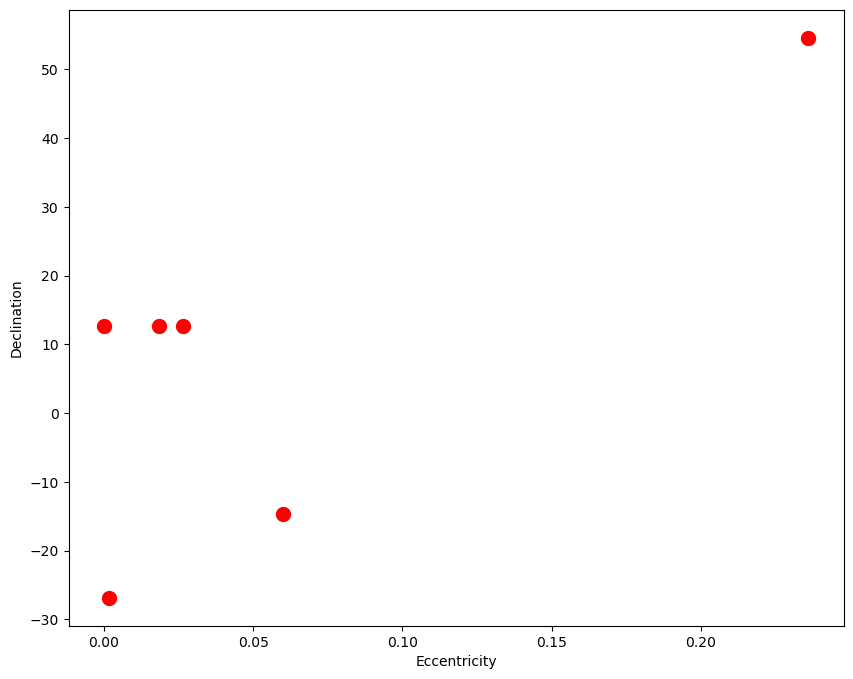

In [24]:
ds3.plot.scatter("Eccentricity", "Declination", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

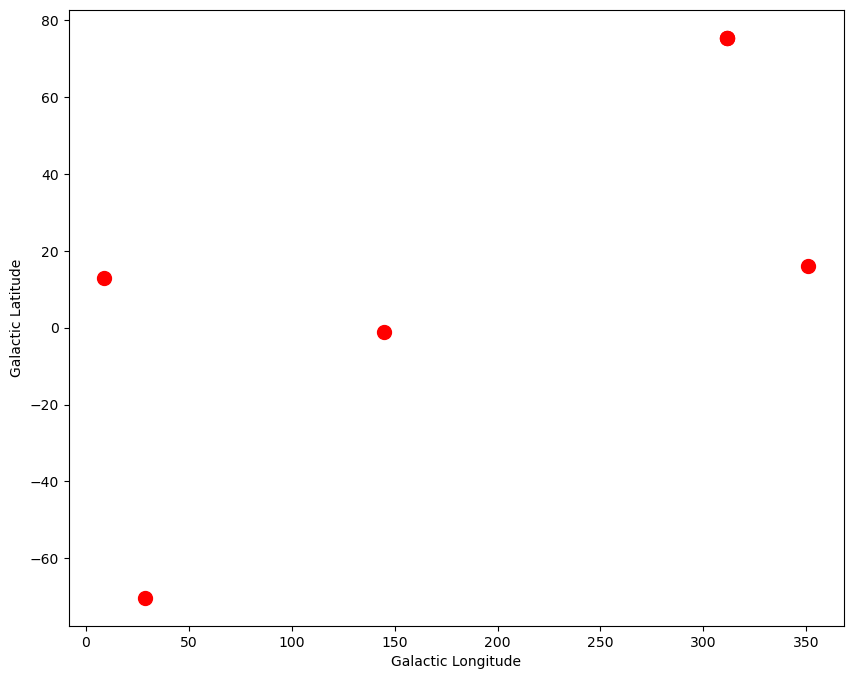

In [25]:
ds3.plot.scatter("Galactic Longitude", "Galactic Latitude", figsize = (10, 8), c = 'red', s = 100)

<Axes: xlabel='Right Ascention', ylabel='Declination'>

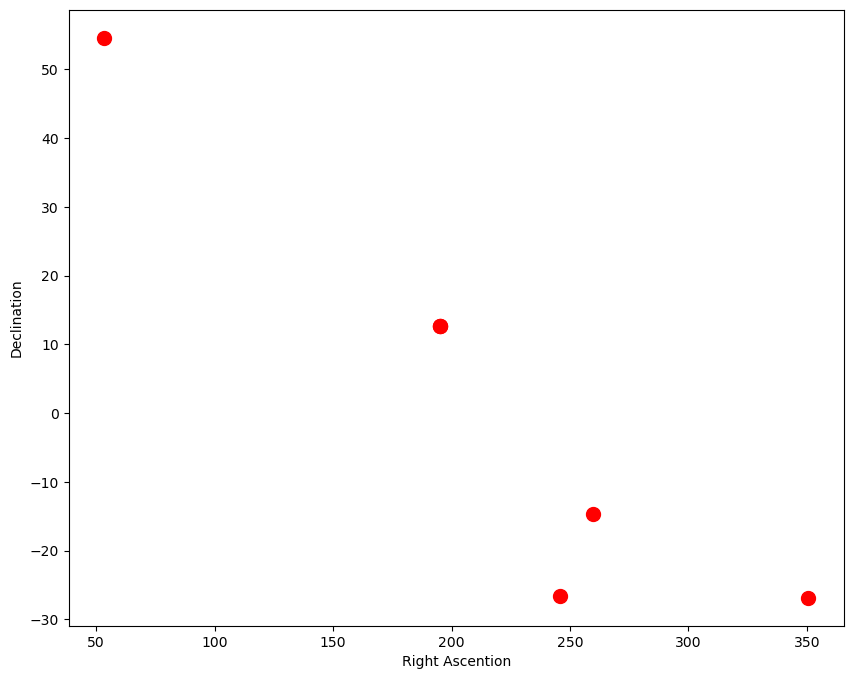

In [26]:
ds3.plot.scatter("Right Ascention", "Declination", figsize = (10, 8), c = 'red', s = 100)

<Axes: ylabel='count'>

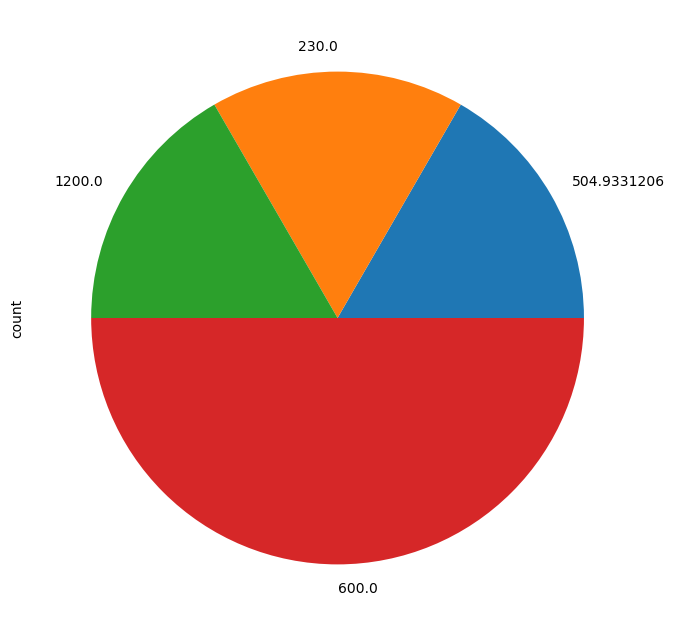

In [27]:
""" Counting the stellar ages of the planets """

ds3["Distance"].value_counts().sort_values().plot(kind = 'pie', figsize = (10, 8))

# The Second Dataframe: *Microlensing*

In [28]:
ds4.head(10)

,Planet Mass (Jupiter),Planet Mass (Earth),Lens Mass,Lens Distance,Source Distance,Planet-Star Mass Ratio,Right Ascention,Declination,Galactic Longitude,Galactic Latitude
Planet Name,,,,,,,,,,
KMT-2019-BLG-1953L b,NaN,NaN,NaN,NaN,8000.0,19.100,269.116250,-28.201111,1.84965,-1.67021
MOA-2013-BLG-605L b,0.06475,20.58,0.198,3550.0,NaN,3.124,272.019257,-29.731583,1.76466,-4.63415
KMT-2019-BLG-1953L b,NaN,NaN,NaN,NaN,8000.0,18.200,269.116250,-28.201111,1.84965,-1.67021
OGLE-2005-BLG-390L b,0.01700,5.50,0.220,6600.0,8000.0,0.760,268.579958,-30.377306,359.73255,-2.36161
OGLE-2012-BLG-0950L b,0.11000,36.00,0.550,3400.0,NaN,1.900,272.019257,-29.731583,1.76466,-4.63415
OGLE-2016-BLG-1067L b,0.43000,140.00,0.310,3780.0,7660.0,13.170,273.204500,-27.012639,4.66003,-4.25075
OGLE-2005-BLG-071L b,3.80000,1200.00,0.460,3200.0,8600.0,77.000,267.540708,-34.673194,355.58019,-3.78643
OGLE-2018-BLG-0740L b,1.10000,350.00,0.470,7200.0,8000.0,23.000,272.176958,-29.835806,1.73882,-4.80424
OGLE-2016-BLG-1190L b,13.38000,4253.00,0.880,6770.0,8700.0,144.600,269.717926,-27.613556,2.62470,-1.83687


<Axes: xlabel='Lens Distance', ylabel='Source Distance'>

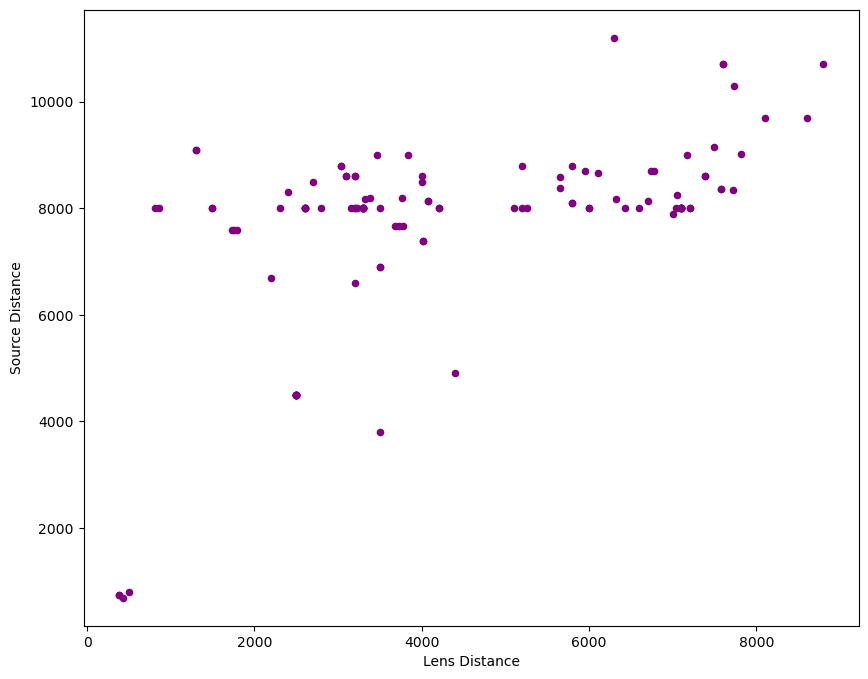

In [29]:
ds4.plot.scatter("Lens Distance", "Source Distance", figsize = (10, 8), c = 'purple')

<Axes: xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

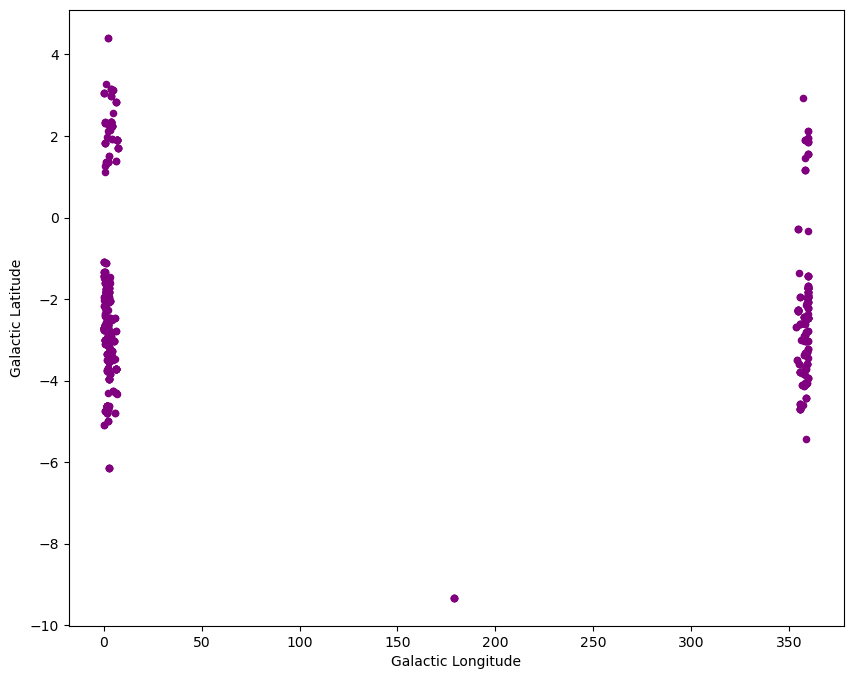

In [30]:
ds4.plot.scatter("Galactic Longitude", "Galactic Latitude", figsize = (10, 8), c = 'purple')

<Axes: xlabel='Planet Mass (Earth)', ylabel='Source Distance'>

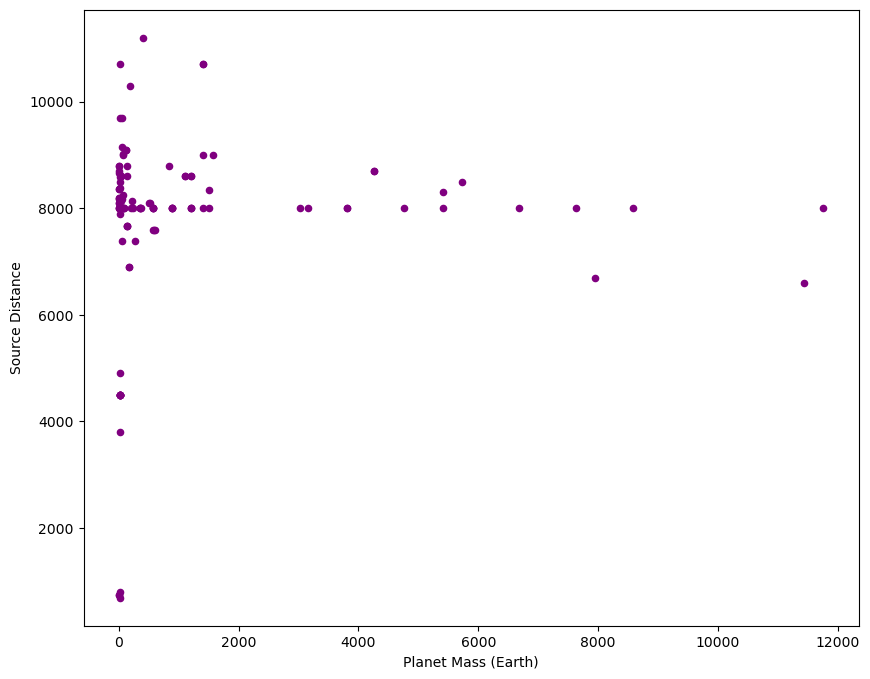

In [31]:
ds4.plot.scatter("Planet Mass (Earth)", "Source Distance", figsize = (10, 8), c = 'purple')

<Axes: xlabel='Lens Mass', ylabel='Lens Distance'>

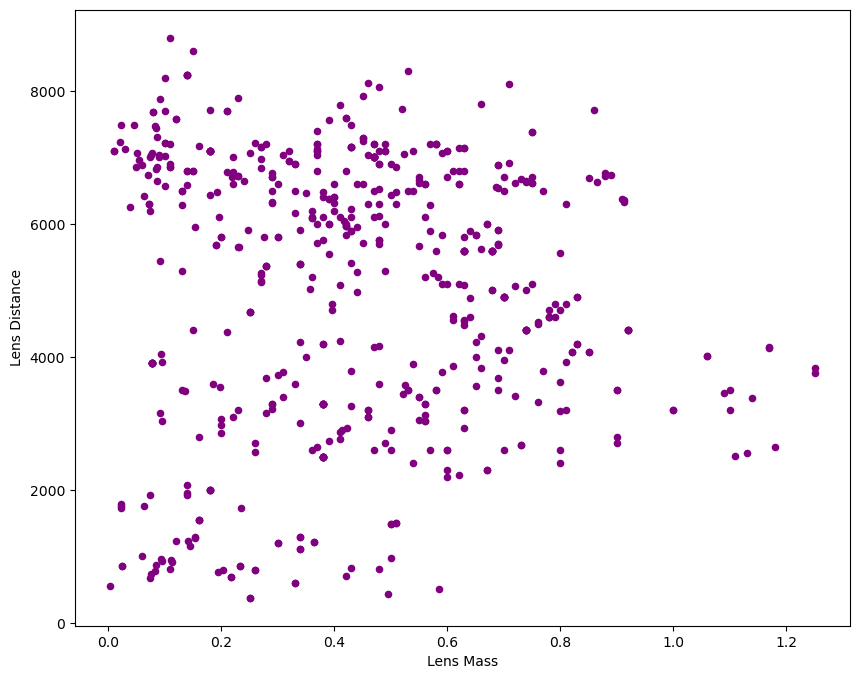

In [32]:
ds4.plot.scatter("Lens Mass", "Lens Distance", figsize = (10, 8), c = 'purple')

<Axes: xlabel='Right Ascention', ylabel='Declination'>

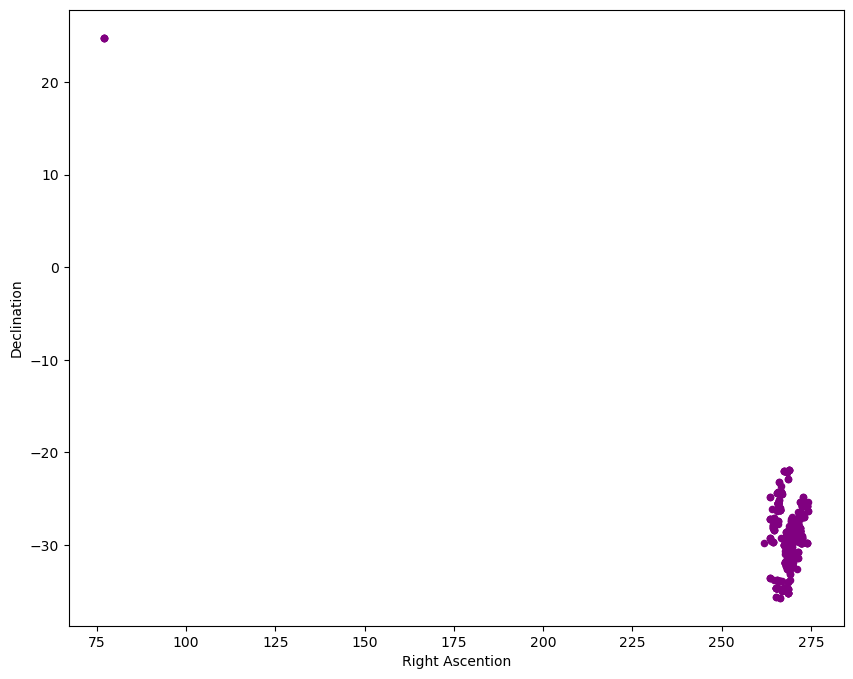

In [33]:
ds4.plot.scatter("Right Ascention", "Declination", figsize = (10, 8), c = 'purple')

# The Third Dataframe: *Direct Imaging*

In [34]:
ds5.head(10)

,Distance,Right Ascention,Declination,Galactic Longitude,Galactic Latitude,Stellar Mass,Stellar Age,Planet Mass (Jupiter),Planet Temperature,Planet Radius (Jupiter)
Planet Name,,,,,,,,,,
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,7.0,NaN,NaN
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,2.0,675.0,1.00
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,2.0,675.0,NaN
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,2.0,675.0,NaN
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,2.0,675.0,NaN
51 Eri b,29.4,69.400551,-2.473548,198.61262,-30.657612,1.75,20.0,2.0,675.0,NaN
HIP 65426 b,111.4,201.150406,-51.504459,308.17875,11.029184,1.96,14.0,12.0,1260.0,1.30
HIP 65426 b,111.4,201.150406,-51.504459,308.17875,11.029184,1.96,14.0,NaN,1200.0,1.80
HIP 65426 b,111.4,201.150406,-51.504459,308.17875,11.029184,1.96,14.0,NaN,1600.0,1.15


<Axes: xlabel='Planet Mass (Jupiter)', ylabel='Distance'>

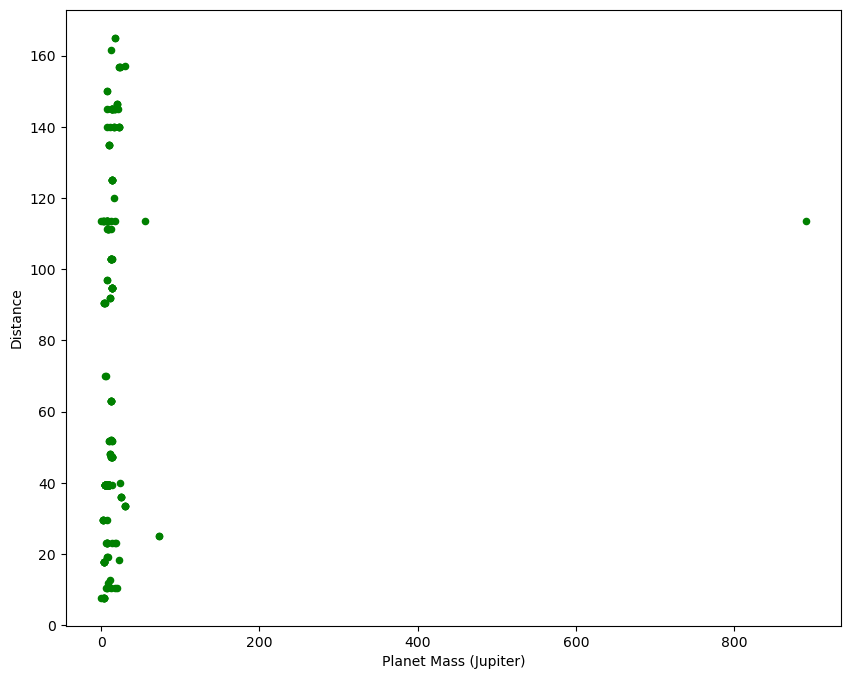

In [35]:
ds5.plot.scatter("Planet Mass (Jupiter)", "Distance", figsize = (10, 8), c = 'green')

<Axes: xlabel='Planet Radius (Jupiter)', ylabel='Distance'>

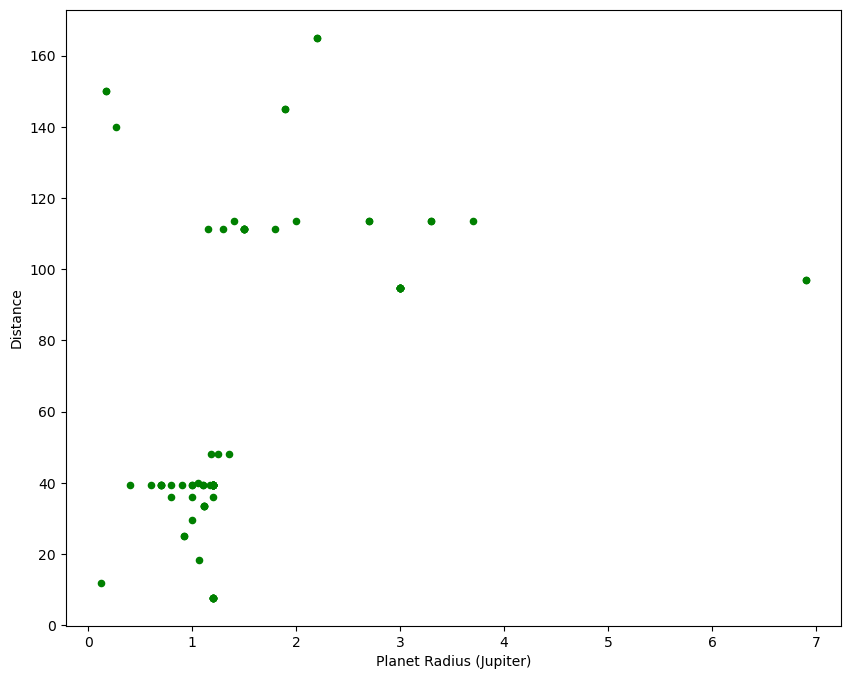

In [36]:
ds5.plot.scatter("Planet Radius (Jupiter)", "Distance", figsize = (10, 8), c = 'green')

<Axes: xlabel='Stellar Mass', ylabel='Distance'>

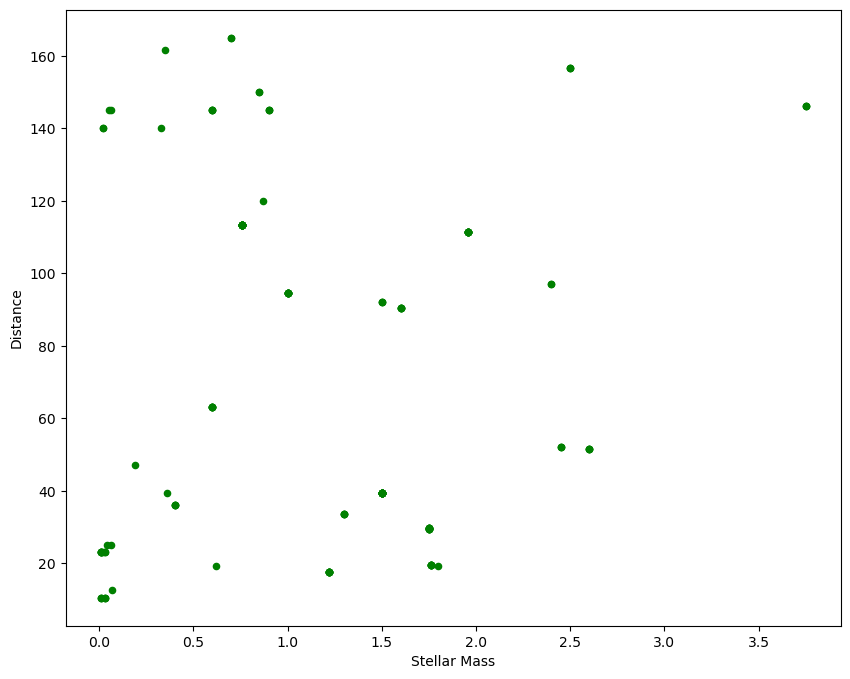

In [37]:
ds5.plot.scatter("Stellar Mass", "Distance", figsize = (10, 8), c = 'green')

<Axes: xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

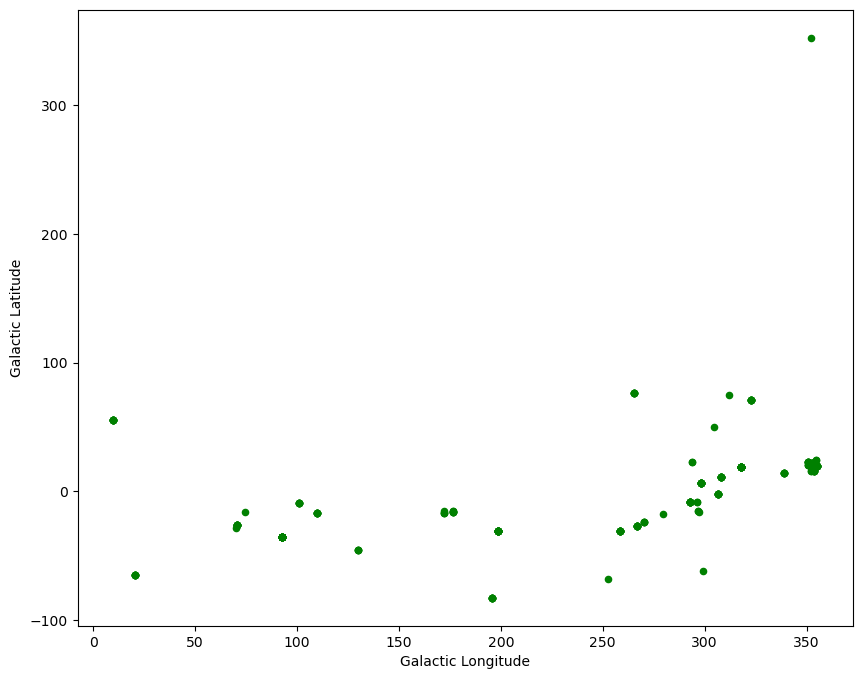

In [38]:
ds5.plot.scatter("Galactic Longitude", "Galactic Latitude", figsize = (10, 8), c = 'green')

<Axes: xlabel='Stellar Mass', ylabel='Stellar Age'>

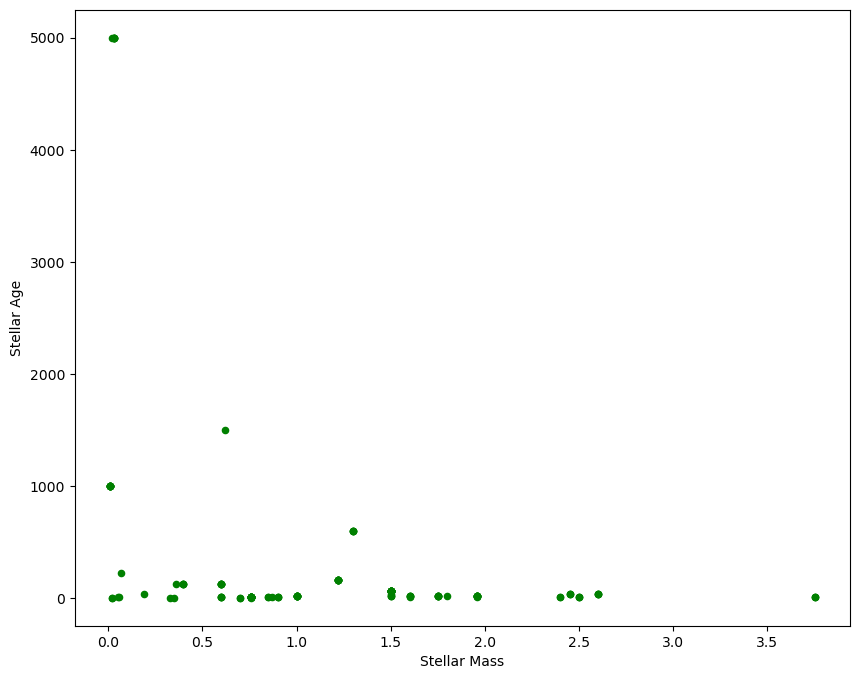

In [39]:
ds5.plot.scatter("Stellar Mass", "Stellar Age", figsize = (10, 8), c = 'green')

<Axes: xlabel='Right Ascention', ylabel='Declination'>

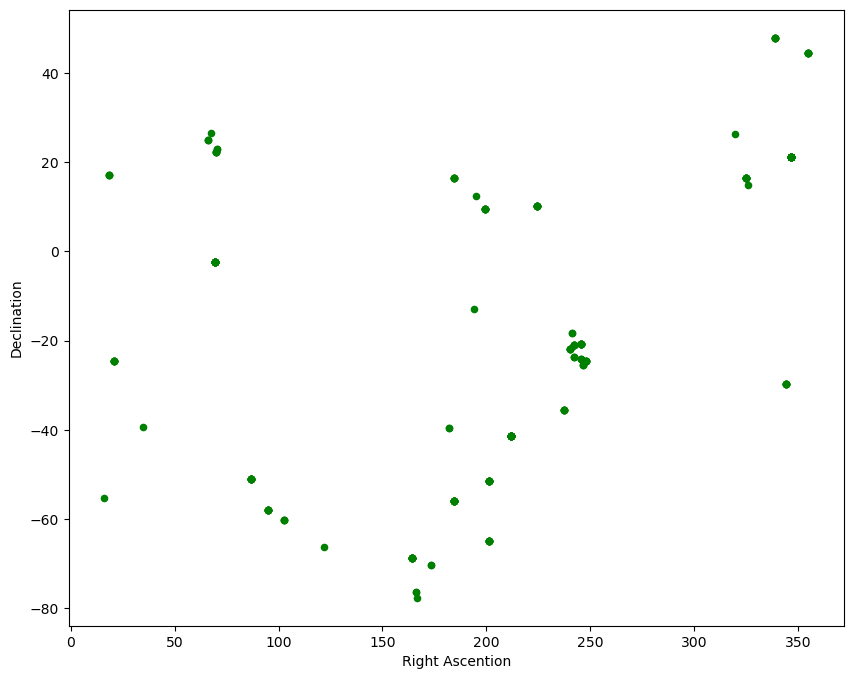

In [40]:
ds5.plot.scatter("Right Ascention", "Declination", figsize = (10, 8), c = 'green')

<Axes: ylabel='Stellar Age'>

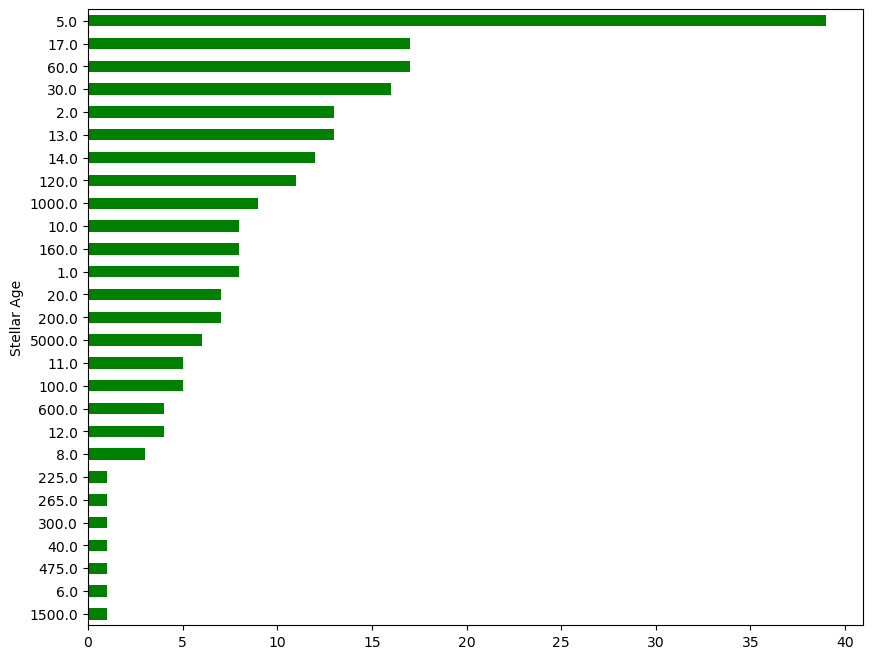

In [41]:
""" Counting the planets' stellar """

ds5["Stellar Age"].value_counts().sort_values().plot(kind = 'barh', figsize = (10, 8), color = 'green')

<Axes: ylabel='Distance'>

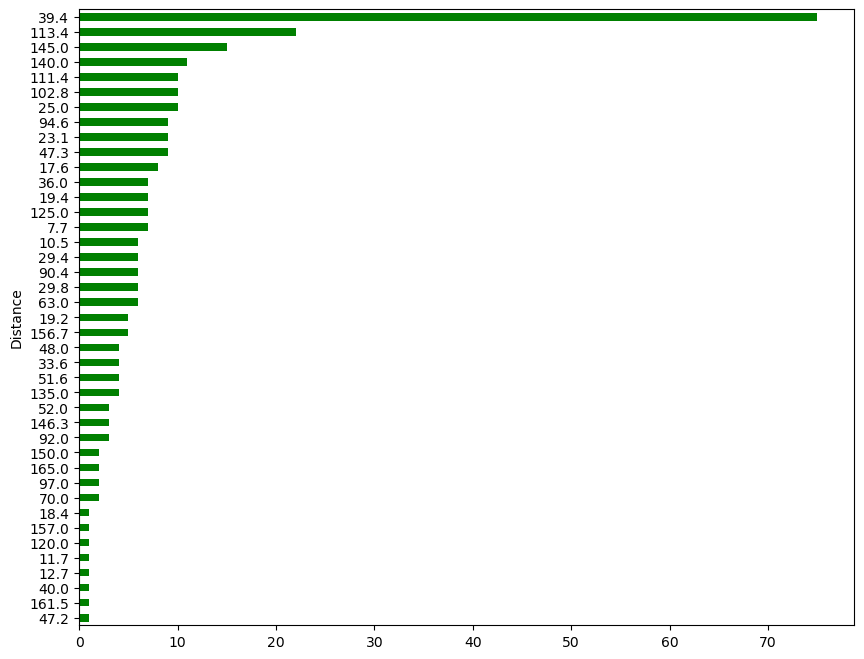

In [42]:
""" Counting the planets' distance from Earth """

ds5["Distance"].value_counts().sort_values().plot(kind = 'barh', figsize = (10, 8), color = 'green')

<Axes: xlabel='Planet Temperature'>

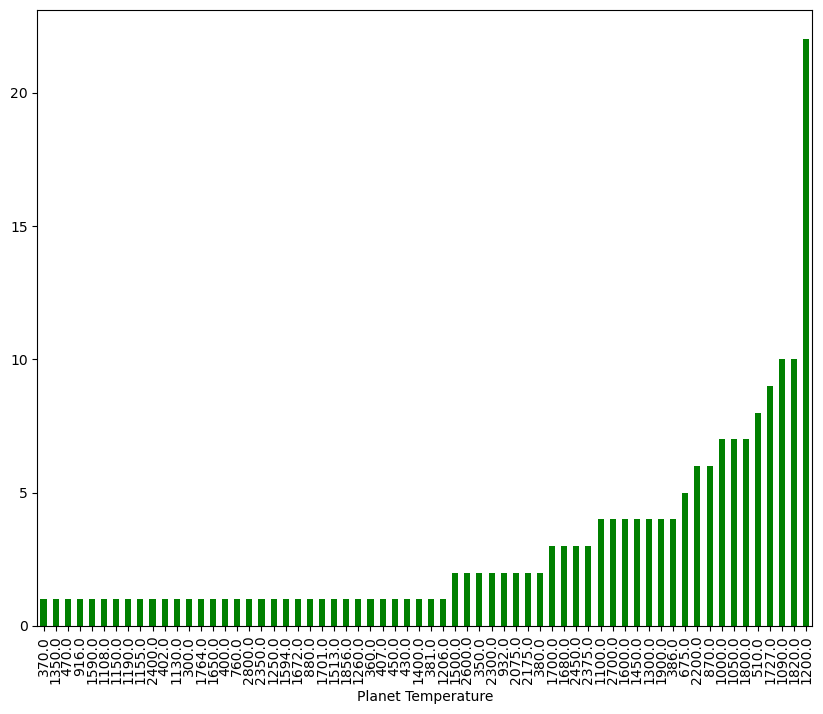

In [43]:
ds5["Planet Temperature"].value_counts().sort_values().plot(kind = 'bar', figsize = (10, 8), color = 'green')

# The Fourth Dataframe: *Transit*

In [44]:
ds6.head(10)

,Planet Radius (Earth),Planet Radius (Jupiter),Eccentricity,Inclination,Transit Depth,Transit Duration,Ratio of Planet to Stellar Radius,Stellar Radius,Stellar Surface Gravity,Right Ascention,Declination,Galactic Latitude,Galactic Longitude
Planet Name,,,,,,,,,,,,,
OGLE-TR-10 b,14.011,1.250,NaN,90.00,1.210000,NaN,NaN,1.17,NaN,267.867748,-29.876476,-1.57666,359.85149
55 Cnc e,NaN,NaN,0.174,NaN,NaN,NaN,NaN,NaN,NaN,133.146837,28.329815,37.69663,196.79526
55 Cnc e,2.080,0.186,0.061,87.30,0.041000,1.596000,0.0202,0.94,4.45,133.146837,28.329815,37.69663,196.79526
55 Cnc e,NaN,NaN,0.028,90.36,NaN,NaN,NaN,0.96,4.42,133.146837,28.329815,37.69663,196.79526
55 Cnc e,1.910,0.170,NaN,83.30,NaN,NaN,0.0187,0.96,4.42,133.146837,28.329815,37.69663,196.79526
WASP-127 b,NaN,NaN,0.000,88.20,NaN,NaN,0.1004,1.35,4.20,160.558765,-3.834999,46.06148,252.72353
TOI-4145 A b,12.183,1.087,NaN,NaN,1.974000,1.712000,NaN,0.86,4.54,39.429744,80.267384,18.35224,127.50137
HD 235088 b,1.990,0.178,NaN,NaN,0.061314,2.711619,NaN,0.78,4.58,300.615454,53.377442,11.77419,87.45784
TOI-2498 b,6.060,0.541,0.089,87.12,NaN,NaN,0.0400,1.26,4.30,95.416220,11.251648,-1.38131,199.53738


<Axes: xlabel='Eccentricity', ylabel='Inclination'>

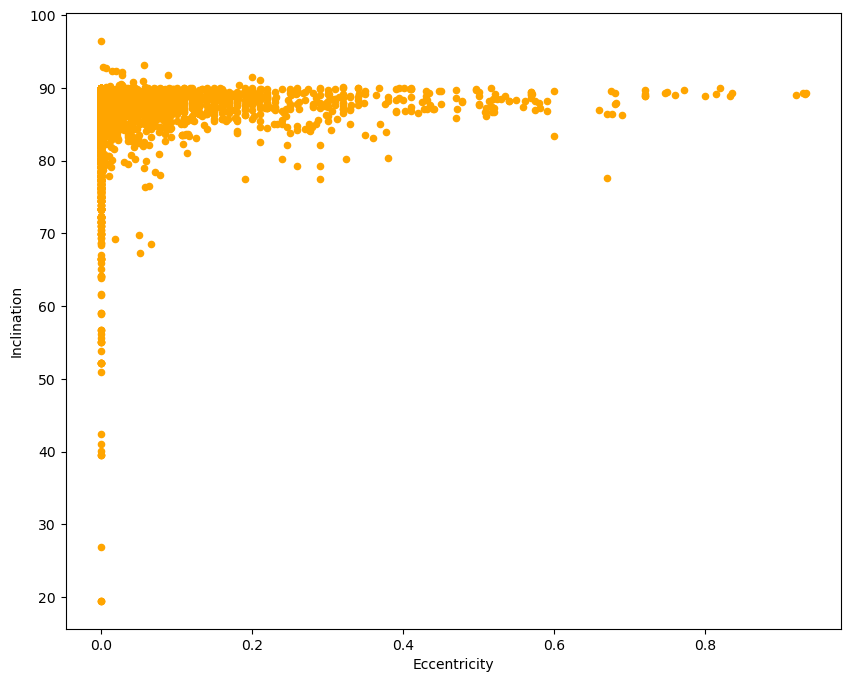

In [45]:
ds6.plot.scatter("Eccentricity", "Inclination", figsize = (10, 8), c = 'orange')

<Axes: xlabel='Transit Depth', ylabel='Transit Duration'>

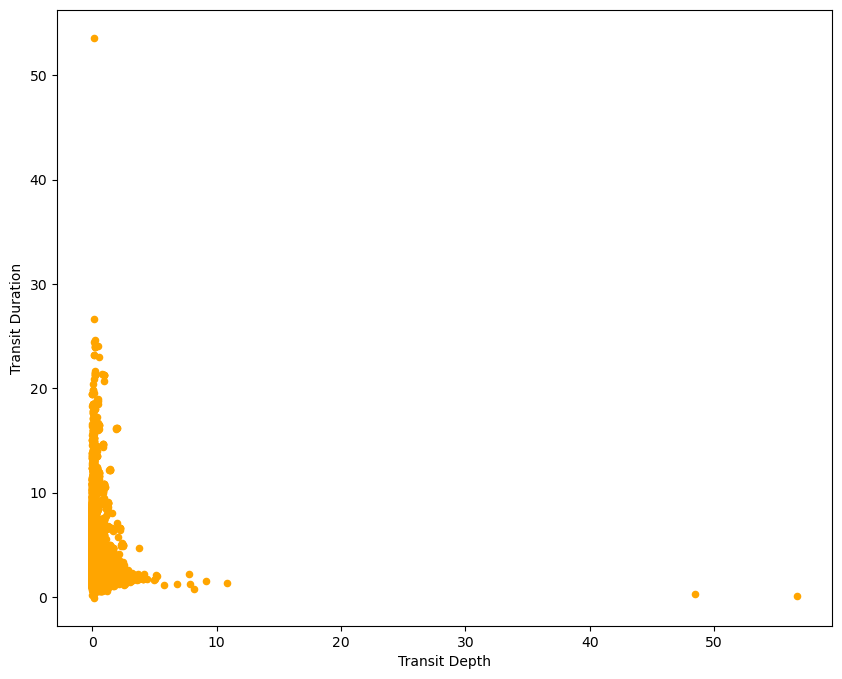

In [46]:
ds6.plot.scatter("Transit Depth", "Transit Duration", figsize = (10, 8), c = 'orange')

<Axes: xlabel='Right Ascention', ylabel='Declination'>

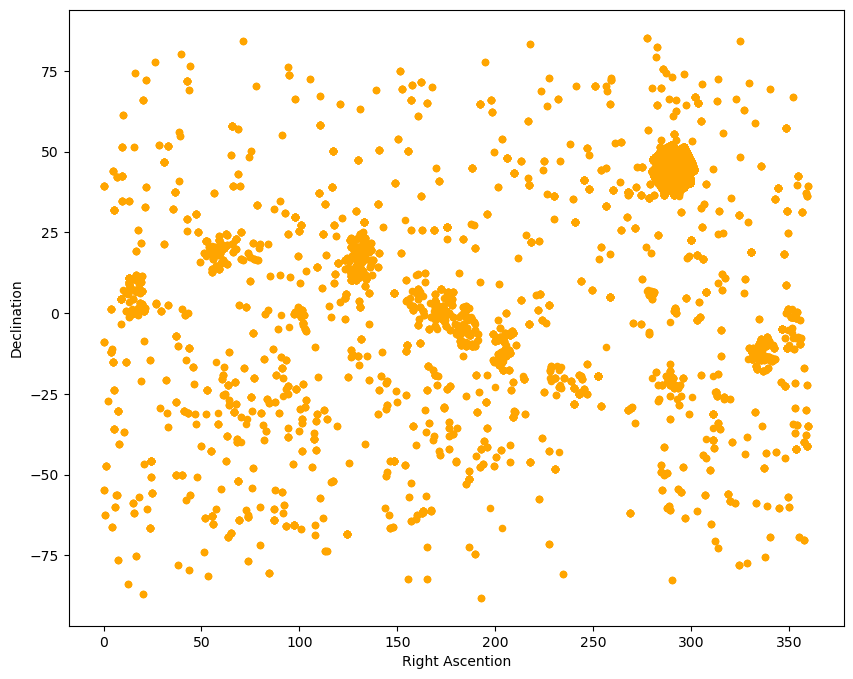

In [47]:
ds6.plot.scatter("Right Ascention", "Declination", figsize = (10, 8), c = 'orange')

<Axes: xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

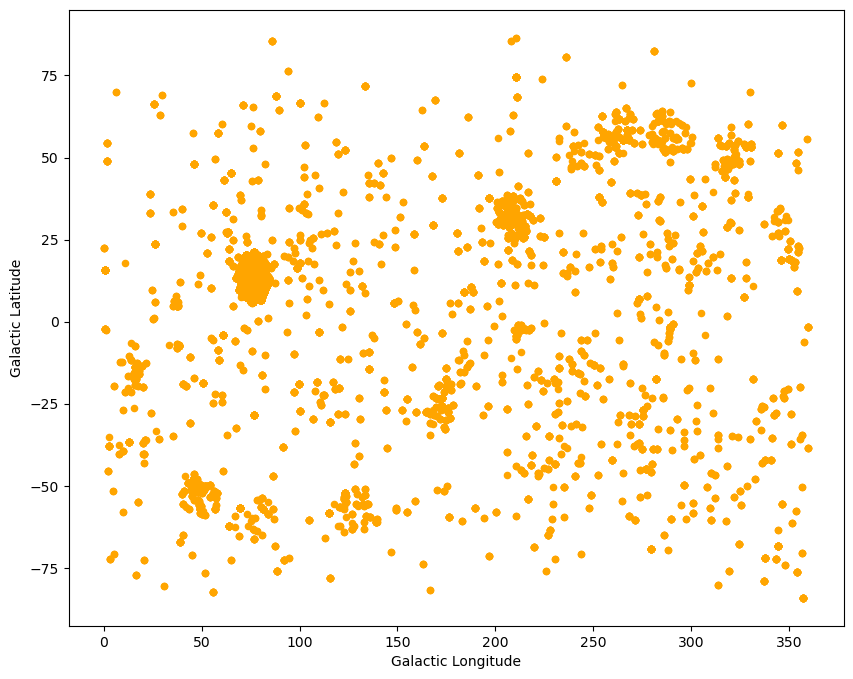

In [48]:
ds6.plot.scatter("Galactic Longitude", "Galactic Latitude", figsize = (10, 8), c = 'orange')